# TF-IDF

$ idf(t, D) = log { {|D|} \over {|\{ d \in D: t \in d \}|} }$, D is all the documents in the corpus   
$ idf(t, D) =   log { {1 + |D|} \over { 1 + |\{ d \in D: t \in d \}|} } + 1 $, smoothed version     
$ tf(t,d) $, Term frequency - the number of times that term t occurs in document d.   

$ tfidf(t,d,D) = tf(t,d) idf(t,D) $   

A high weight in tf–idf is reached by a high term frequency (in the given document) and a low document frequency of the term in the whole collection of documents; the weights hence tend to filter out common terms.

# TF-IDF vs Word Embeddinng

TF-IDF and Word Embedding [`codex/py/keras/6. AutoEncoders and Embeddings/6.8 Word Embeddings.ipynb`] are two of the most common methods in Natural Language Processing (NLP) to convert sentences to machine readable code. In this article we will describe:

<img src='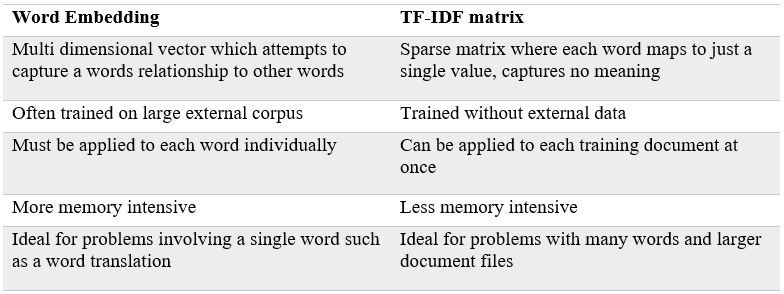
'>

# TF-IDF vs LDA 

LDA requires data in the form of integer counts. So modifying feature values using TF-IDF and then using with LDA doesn't really fit in. You might instead want to try some of the NMF algorithms, which aren't MCMC usually, but they work with general non-negative data. I've seen nice results in CCA this way. However, you can use TF-IDF as a way of screening features/words to then use in the LDA.

Assuming tf-idf gives you a certain weight (let's call it word_score_1) per word while LDA gives you another weight per word w.r.t. a particular topic (let's call this other weight word_score_2), one way is to multiply word_score_1 and word_score_2 for a particular word in a particular topic.

As tf-idf will give common words like "is", "the", etc lower weights (assuming you didn't remove stop words beforehand), simply multiplying will give priority to unique words over common words. 

# Convert document to TF-IDF matrix

`TfidfVectorizer`： 将原始文档的集合转化为tf-idf特性的矩阵，相当于`CountVectorizer`配合`TfidfTransformer`使用的效果。   
[`/codex/py/NLP/Latent Dirichlet Allocation.ipynb`] 中的reuters数据集的X相当于分词后应用`CountVectorizer`的结果。

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
import jieba  # 引入依赖包

tfidf_vectorizer = TfidfVectorizer(sublinear_tf = False, norm = 'l2')  
vectorizer = CountVectorizer()
t = TfidfTransformer(sublinear_tf = True)

real_test_raw = ['丈夫他抢劫杀人罪了跑路的话要判多少年','丈夫借名买车离婚时能否要求分割','妻子离婚时丈夫欠的赌债是否要偿还？','夫妻一方下落不明 离婚请求获支持']  

%run DTM_CHN.py
corpus, vec, vocab = DTM_CHN(real_test_raw)

# vectorizer.fit_transform(real_documents)
ti_vec = tfidf_vectorizer.fit_transform(corpus)  # sparse matrix of (n_samples, n_features). This is not idf-weighted, but the original DTM 
ti_vec = t.fit_transform(vec)

print('===== sklearn built-in TfidfVectorizer ======')

print(tfidf_vectorizer.idf_) #特征对应的权重  
print(tfidf_vectorizer.get_feature_names())#特征词  
print(ti_vec.toarray()) #上面四句话对应的向量表示  

print('')
print('===== tf_idf_matrix.py ======')

%run tf_idf_matrix.py
TF_IDF, IDF = tf_idf_matrix(vec)
print(IDF[IDF > 0]) #特征对应的权重  
print(vocab)#特征词  
print(TF_IDF) #上面四句话对应的向量表示  

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 8062.09it/s]

===== sklearn built-in TfidfVectorizer ======
[1.91629073 1.22314355 1.91629073 1.91629073 1.91629073 1.91629073
 1.91629073 1.91629073 1.91629073 1.91629073 1.91629073 1.91629073
 1.91629073 1.91629073 1.91629073 1.22314355 1.91629073 1.91629073
 1.91629073 1.91629073 1.91629073]
['一方', '丈夫', '下落不明', '买车', '借名', '偿还', '分割', '多少', '夫妻', '妻子', '抢劫', '支持', '是否', '杀人罪', '的话', '离婚', '能否', '要判', '要求', '请求', '赌债']
[[0.         0.27448674 0.         0.         0.         0.
  0.         0.43003652 0.         0.         0.43003652 0.
  0.         0.43003652 0.43003652 0.         0.         0.43003652
  0.         0.         0.        ]
 [0.         0.2646963  0.         0.4146979  0.4146979  0.
  0.4146979  0.         0.         0.         0.         0.
  0.         0.         0.         0.2646963  0.4146979  0.
  0.4146979  0.         0.        ]
 [0.         0.29088811 0.         0.         0.         0.45573244
  0.         0.         0.         0.45573244 0.         0.
  0.45573244 0.     

`tf_idf_matrix.py`使用了raw tf, 与`TfidfTransformer`的结果有差别（差一个scaling比例）